In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualização dos dados ausentes

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


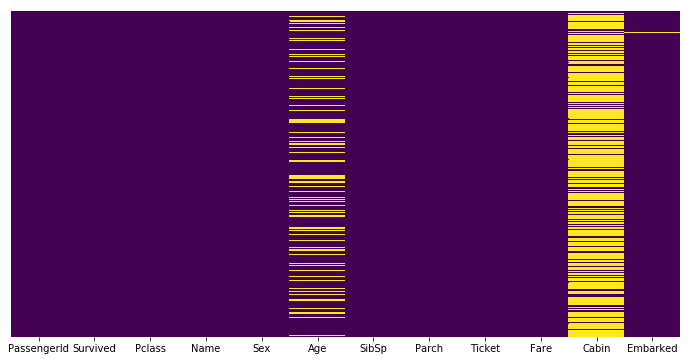

In [6]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

## Análise exploratória dos dados

In [7]:
sns.set_style("whitegrid")

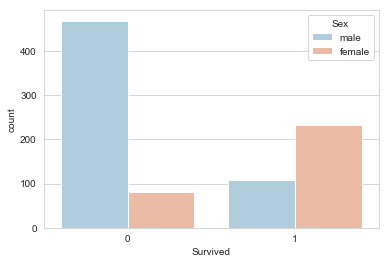

In [8]:
sns.countplot(x="Survived", data=train, hue="Sex", palette="RdBu_r")

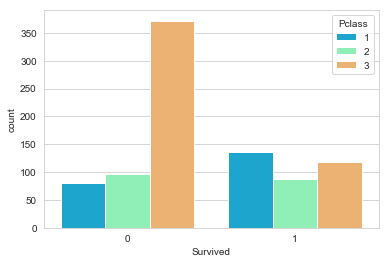

In [9]:
sns.countplot(x="Survived", data=train, hue="Pclass", palette="rainbow")

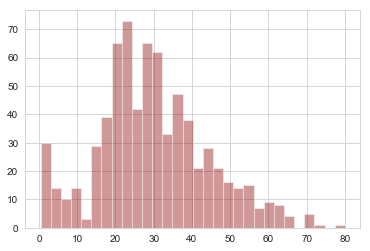

In [10]:
train["Age"].hist(bins=30, color="darkred", alpha=0.4)

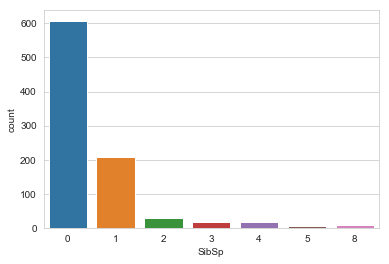

In [11]:
sns.countplot(x="SibSp", data=train)

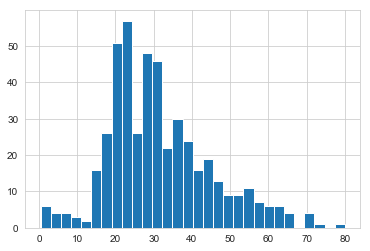

In [12]:
#Histograma de passageiros a viajar sozinhos por idade

train[train["SibSp"] == 0]["Age"].hist(bins=30)

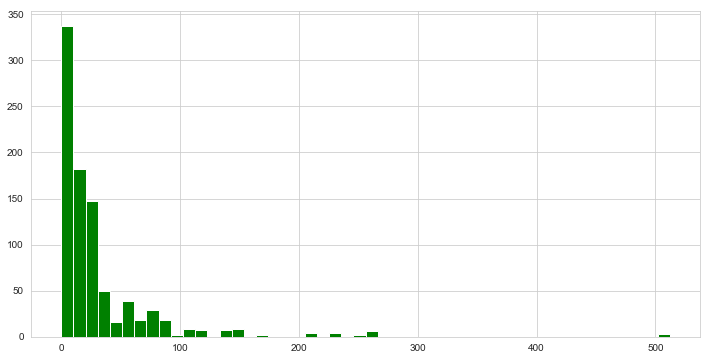

In [13]:
# Histograma dos preços dos bilhetes comprados

train["Fare"].hist(bins=50, color="green", figsize=(12,6))

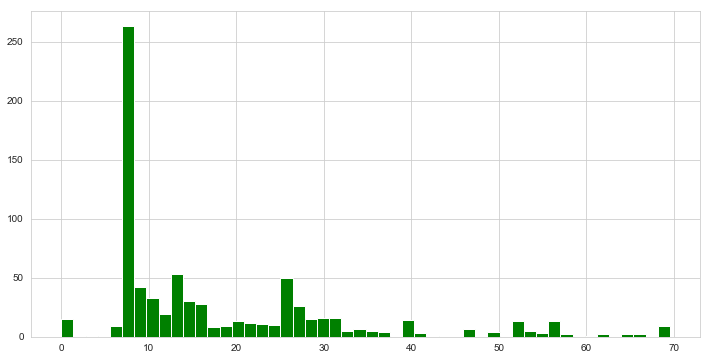

In [14]:
train[train["Fare"]<70]["Fare"].hist(bins=50, color="green", figsize=(12,6))

## Tratamento de dados ausentes

### Idade

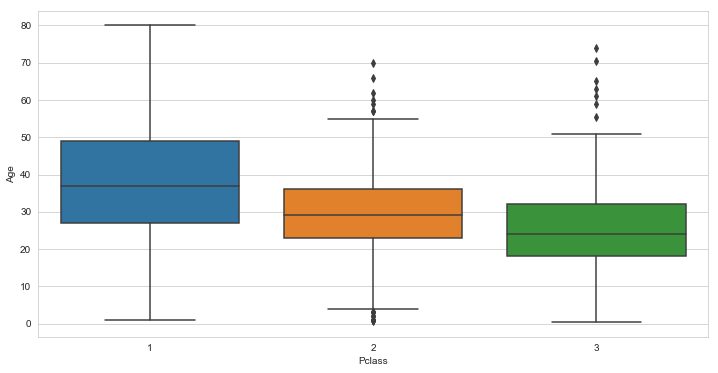

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Pclass", y="Age", data=train)

#### Preencher as idades com a média da classe

In [16]:
def inputar_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade

In [17]:
train['Age'] = train[['Age','Pclass']].apply(inputar_idade,axis=1)

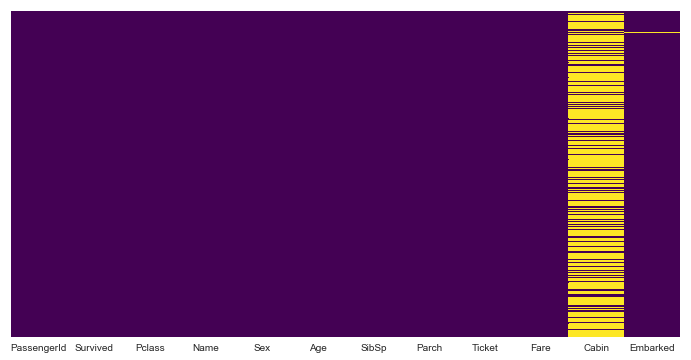

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")

### Cabin

In [19]:
del train["Cabin"]
# train.drop('Cabin',axis=1,inplace=True)

### Embarked

In [20]:
# Apagar a linha que contem o valor de Embarked nulo
train.dropna(inplace=True)

## Convertendo Variaveis Categóricas em Numéricas

In [21]:
#drop_first para ficar só uma coluna > Para evitar a multi-colinaridade
sex = pd.get_dummies(train["Sex"], drop_first=True)

In [22]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

### Excluir colunas e adicionar novas

In [23]:
train.drop(["Sex", "PassengerId", "Name", "Ticket", "Embarked"], axis=1, inplace=True)

In [24]:
train = pd.concat([train, sex, embark], axis=1)

In [25]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Construir o modelo de Regressão Logística

## Divisão treino-teste

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [34]:
logmodel = LogisticRegression(solver='liblinear')

In [35]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
predictions = logmodel.predict(X_test)

## Avaliação

#### Relatório de Classificação

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



precision: 0.81 - O modelo preve 81% do tempo a sobrevivencia de um passageiro correctamente
recall: 
f1-score: 0.80 - combinação da precision e recall

#### Matriz de Confusão

In [39]:
from sklearn.metrics import confusion_matrix

| True Negative |  False Positive |
|---------------|-----------------|
|False Negative | True Positive   |
|               |                 |

In [40]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 36  68]]


True Negative: 148 - Houve 148 casos de passageiros em que o modelo preveu que não sobreviveram de forma correcta
False Positive: 15 - Houve 15 casos de passageiros em que o modelo preveu que não sobreviveram de forma errada

False Negative: 36 - Houve 36 casos de passageiros que o modelo preveu que sobreviveram de forma errada 
False Positive: 68 - Houve 68 casos de passageiros em que o modelo preveu que sobreviveram de forma correcta

Accuracy:
Quanto em média o modelo acerta = (TP+TN)/Total = (68+148)/267 = 0.81
Quanto em média o modelo erra = (FP+FN)/Total = (15+36)/267 = 0.19


Precision:
O modelo preve 81% das vezes correctente quando um passageiro sobrevive
    P = TP/(TP+FP) = 68/(68+15) = 0.81
 
Recall:
O modelo identificou correctamente 65% dos passageiros que sobreviveram realmente
    R = TP/(TP+FN) = 68/(68+36) = 0.65
     
f1-score
    F1 = 2*(P*R)/(P+R) = 2*(0.81*0.65)/(0.81+0.65) = 0.72